# Basics of Deep Learning, Minor in Applied Data Science

## Homework 1. Introduction to PyTorch. Fully Connected Neural Networks.

### General Information

Release Date: 06.10.2021

Soft Deadline: 23:59 MSK 25.10.2021

Hard Deadline: 23:59 MSK 28.10.2021

### Evaluation and Penalties
The maximum possible score for this task is 10 points. For each day of delay, 1 point is deducted. The task cannot be submitted after the hard deadline.

The task is to be completed individually. "Similar" solutions will be considered plagiarism, and all involved students (including those who copied) will not be able to receive more than 0 points for it. If you found the solution (or part of it) from an open source, you must provide a link to that source in a separate block at the end of your work (you will probably not be the only one who found it, so to avoid suspicion of plagiarism, you must provide a link to the source).

Inefficient code implementation may negatively affect your grade. The grade can also be reduced for poorly readable code and poorly formatted plots. All answers must be accompanied by code or comments explaining how they were obtained.

### About the Task

In this task, you are required to predict the year of release of a song based on certain audio features: [data](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). Below you will find code to load the data. Please note that the training and testing datasets are located in the same file, so DO NOT modify the cell where the data is split.


In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import random
from sklearn.metrics import mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from sklearn.datasets import load_boston
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

In [ ]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2021-10-26 19:23:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: ‘data.txt.zip’

data.txt.zip        100%[===================>] 201.24M  41.3MB/s    in 5.3s    

2021-10-26 19:23:12 (37.7 MB/s) - ‘data.txt.zip’ saved [211011981/211011981]



In [ ]:
import pandas as pd
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34.56445,-5.07092,-47.75605,64.81513,-97.42948,-12.59418,55.23699,28.85657,54.53513,-31.97077,20.03279,-8.07892,-55.12617,26.58961,-10.27183,-30.64232,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.6

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Task 0. (0 points, but if not completed, the maximum for the entire task is 0 points)

We will use RMSE as a quality metric. For the very first baseline` train the Ridge regression from sklearn. Also, calculate the quality with the best constant forecast.

In [ ]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn import preprocessing

In [ ]:
ridge = Ridge()
ridge_fitted = ridge.fit(X_train, y_train)

In [ ]:
y_pred = ridge_fitted.predict(X_test)

In [ ]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

9.510160711373395

In [ ]:
# Построить Константную Модель (наилучший констанстный прогноз - среднее, так как используем в качестве метрики RMSE )
mean_squared_error(np.ones((len(y_test),), dtype=int)*(sum(y_train)/y_train.shape[0]), y_test, squared = False)

10.85246390513634

## Assignment 1 (maximum 10 points)

Implement the training and testing of a neural network for the dataset provided to you. The relationship between the obtained metric on the test set and the points for the task is as follows:

- $\text{RMSE} \le 9.00 $ — 4 points
- $\text{RMSE} \le 8.90 $ — 6 points
- $\text{RMSE} \le 8.80 $ — 8 points
- $\text{RMSE} \le 8.75 $ — 10 points

There are several rules that you need to follow:

- The entire training pipeline must be written in PyTorch. You may use other libraries (e.g., `numpy`, `sklearn`, etc.) but only for data processing. In other words, transforming data and calculating metrics using these libraries is allowed, but importing models from `sklearn` and achieving the required quality with them is not allowed. Models from PyTorch should be used only.
  
- We do not restrict your choice of the model architecture, but most likely, a fully connected neural network will be sufficient.

- During training, you are not allowed to use any data other than the training set.

- Ensemble learning is prohibited.

### Useful Tips:

- It is unlikely that you will achieve 10 points on your first attempt, so try different architectures, optimizers, and hyperparameter values. Ideally, with each new experiment, you should change only one thing to clearly understand how each factor influences the result.

- The fact that we are working with deep learning doesn't mean that you should forget about techniques used in classical machine learning. So, make sure to perform exploratory data analysis, plot necessary graphs, and don't forget about scaling and hyperparameter tuning.

- You will most likely encounter overfitting with your neural network. There are specific regularization methods for neural networks, such as dropout ([article](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) and weight decay ([blog post](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). These are implemented in PyTorch. Try experimenting with them.

- If you don't know something, don't hesitate to Google it. There's a lot of helpful information, tutorials, and advice on deep learning in general and PyTorch in particular. But remember, you will be held accountable for any code you use without citing the source.

- If you implement training on a GPU, you will have more time for experiments, as all computations will run faster. Google Colab provides several free GPU hours per day (usually around 8-10).

- To debug your code, you can train on a small portion of the data or even just one batch. If the loss on the training set isn't decreasing, something is definitely wrong!

- Use utilities that PyTorch provides (e.g., Dataset and Dataloader). These are specifically designed to simplify the development of the training pipeline.

- You will probably want to track the training progress. For this, you can use a convenient library like `tqdm` to create progress bars.

- You might want the graphs to be plotted during training. You can use the `clear_output` function from [IPython](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output) to remove the old graph and plot a new one in its place.

**IMPORTANT**: Your solution must be reproducible. If it is not, the grader has the right to lower your grade. To fix the random seed, use the function in the cell below.


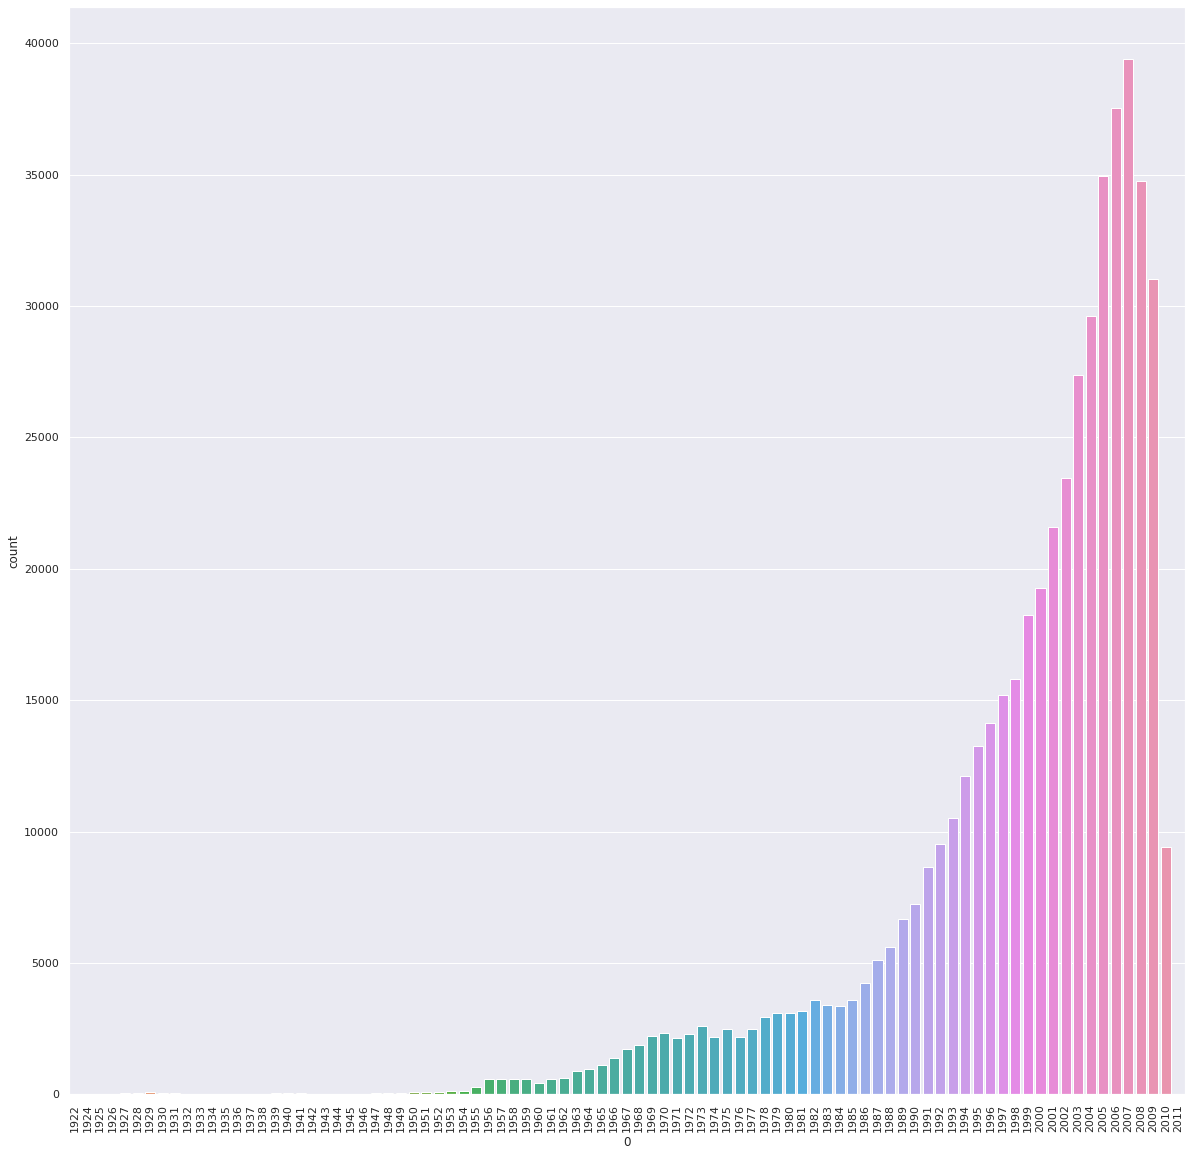

In [ ]:
# Let's draw a graph of the distribution by year in order to understand how balanced the sample is
import seaborn as sns
sns.set({'figure.figsize':(20,20)})
sns.countplot(x=0, data=df).set_xticklabels(a.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.default_rng(seed)
    np.random.seed(seed)
    random.seed(seed)

In [ ]:
# Для пущей воспроизводимости
torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True) 

You can adhere to any adequate code structure, but we recommend using the following function signatures. It's best if you check your predictions with an assertware: this way you will save yourself from various mistakes, for example, that the prediction vector consists of only one number. In any case, keep a close eye on which tensors you consider the RMSE metric for. If they are accidentally or intentionally misled, the inspectors will get very angry.

In [ ]:
# Отмасштабируем данные
X_train_unscaled = X_train
X_test_unscaled = X_test
y_train_unscaled = y_train
y_test_unscaled = y_test
normalizer_X = preprocessing.StandardScaler()
X_train_scaled = normalizer_X.fit_transform(X_train_unscaled)
X_test_scaled = normalizer_X.transform(X_test_unscaled)
normalizer_y = preprocessing.StandardScaler()
norm_y_mean_and_std = normalizer_y.fit(pd.DataFrame(data=y_train_unscaled))
y_train_scaled = norm_y_mean_and_std.transform(pd.DataFrame(data=y_train_unscaled))
y_test_scaled = norm_y_mean_and_std.transform(pd.DataFrame(data=y_test_unscaled))

In [ ]:
class SongsDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": torch.tensor(self.x[idx, :], dtype=torch.float), "target": self.y[idx]}

In [209]:
set_random_seed(12) # для воспроизводимости (для этой же цели shuffle=False)
train_set_scaled = SongsDataset(X_train_scaled, y_train_scaled) 
train_loader_scaled = torch.utils.data.DataLoader(train_set_scaled, batch_size=14, shuffle=False) 

test_set_scaled = SongsDataset(X_test_scaled, y_test_scaled) 
test_loader_scaled = torch.utils.data.DataLoader(test_set_scaled, batch_size=14, shuffle=False)
model = nn.Sequential(
    nn.BatchNorm1d(90), 
    nn.Linear(90, 60),
    nn.ReLU(),
    nn.BatchNorm1d(60),
    nn.Linear(60, 30),
    nn.ReLU(),
    nn.Linear(30, 10),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(10, 1),
    )
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [ ]:
# график, выводящий ошибку на трейне в зависимости от времени
def plot_history_of_train(train_history, title="Train_loss"):

    plt.figure(figsize=(9, 6))
    plt.title('{}'.format(title))
    plt.plot(train_history, label="train", zorder=1)

    plt.xlabel("train steps")
    
    plt.legend(loc="best")
    plt.grid()

    plt.show()

In [ ]:
# график, выводящий ошибку на тесте в зависимости от времени
def plot_history_of_test(test_history, title="Train_loss"):
  
    plt.figure(figsize=(9, 6))
    plt.title('{}'.format(title))
    plt.plot(test_history, label="train", zorder=1)

    plt.xlabel("train steps")
    
    plt.legend(loc="best")
    plt.grid()

    plt.show()

In [ ]:
def train(model, optimizer, criterion, train_loader, number_of_epochs): 
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    '''
    train_loss_log = []                                           
    model.train()
    for epoch in range(number_of_epochs):
      train_epoch_loss = torch.empty(0)
      for batch in tqdm(train_loader_scaled):                      # берем батч из трейн лоадера
        y_pred = model(batch['sample'].to(torch.float))            # делаем предсказания
        loss = torch.sqrt(criterion(y_pred, batch['target'].to(torch.float)))    # считаем лосс
        loss.backward()                                            # считаем градиенты обратным проходом
        optimizer.step()                                           # обновляем параметры сети
        optimizer.zero_grad()                                      # обнуляем посчитанные градиенты параметров
        loss = torch.mul(loss.detach(), torch.tensor(normalizer_y.scale_))  # обратно масштабируем лосс
        train_epoch_loss = torch.cat((train_epoch_loss, loss.unsqueeze(0))) # записываем лоссы каждой эпохи
        train_loss_log.append(loss.item())                                  # записываем лоссы для всего трейна 

      plot_history_of_train(train_loss_log,  "loss")                        
      print("Train loss:", train_epoch_loss.mean().item())

  0%|          | 0/23186 [00:00<?, ?it/s]

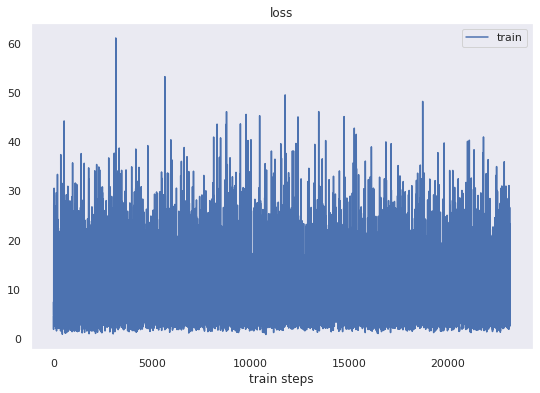

Train loss: 8.692166949365582


  0%|          | 0/23186 [00:00<?, ?it/s]

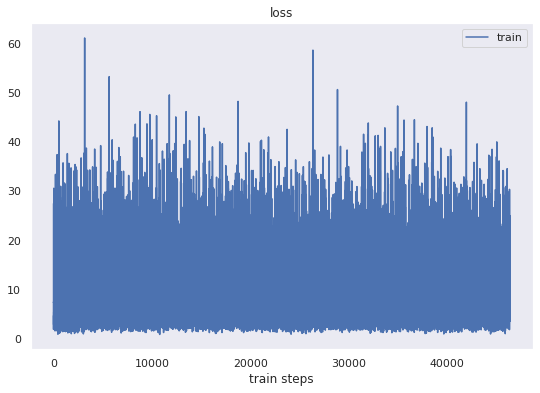

Train loss: 8.410866054613933


  0%|          | 0/23186 [00:00<?, ?it/s]

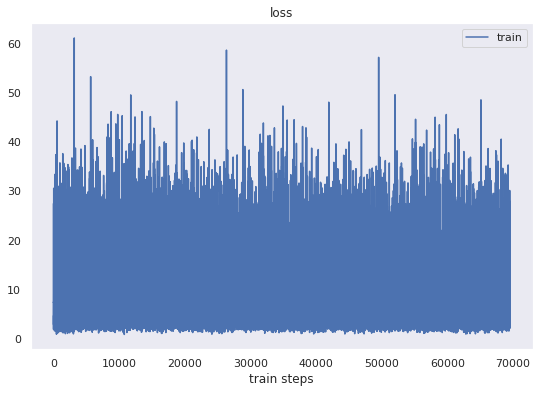

Train loss: 8.316745258205684


In [ ]:
# Да, размер батча небольшой, но 2 эпохи за пару минут посчитаются
train(model, optimizer, criterion, train_loader_scaled, 2)

In [ ]:
def test(model, criterion, test_loader, number_of_epochs):
    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''
    test_loss_log = []
    for epoch in range(number_of_epochs):
      test_epoch_loss = torch.empty(0)                             # сюда будем складывать **средний по батчу** лосс
      predicts = torch.empty(0)                                    # сюда будем складывать предикты модели
      model.eval()
      with torch.no_grad():                                        # на валидации запрещаем фреймворку считать градиенты по параметрам
        for batch in tqdm(test_loader_scaled):                     # берем батч из вал лоадера
          y_pred = model(batch['sample'].to(torch.float))          # делаем предсказания
          loss = torch.sqrt(criterion(y_pred, batch['target']))    # считаем лосс
          loss = torch.mul(loss.detach(), torch.tensor(normalizer_y.scale_))      # масштабируем лосс
          test_epoch_loss = torch.cat((test_epoch_loss, loss.unsqueeze(0)))
          test_loss_log.append(test_epoch_loss.mean())
          predicts = torch.cat((predicts, y_pred))

      plot_history_of_test(test_loss_log)
      print("Val loss:", test_epoch_loss.mean().item())

    return predicts


  0%|          | 0/2582 [00:00<?, ?it/s]

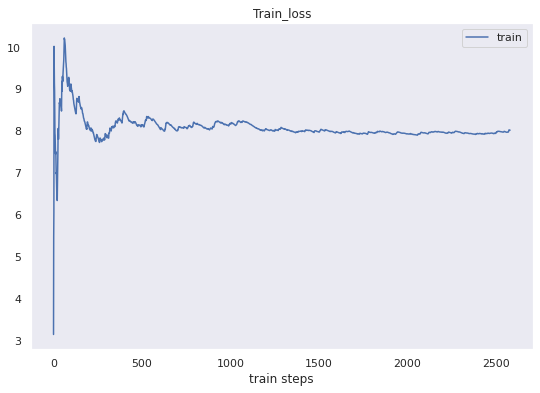

Val loss: 8.023358912893736


  0%|          | 0/2582 [00:00<?, ?it/s]

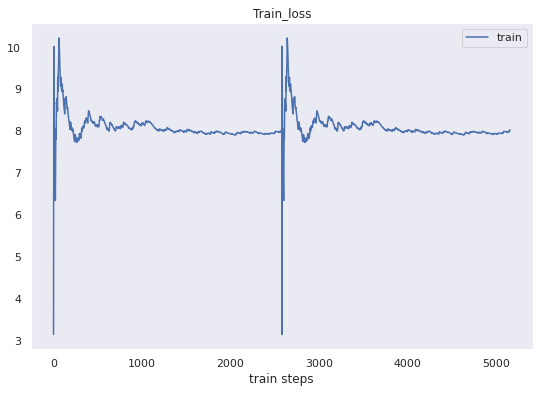

Val loss: 8.023358912893736


  0%|          | 0/2582 [00:00<?, ?it/s]

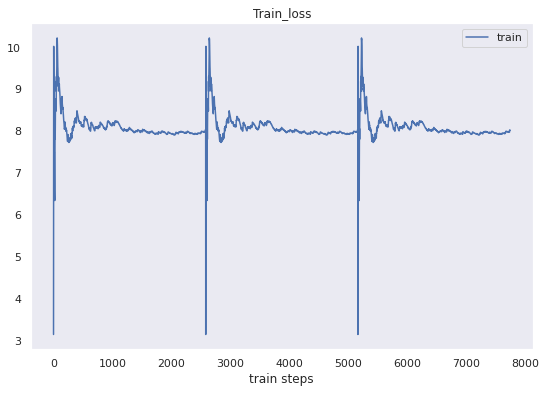

Val loss: 8.023358912893736


In [ ]:
predicts = test(model, criterion, test_loader_scaled, 2)

In [ ]:
predicts

tensor([[-0.0602],
        [ 0.3839],
        [ 0.3590],
        ...,
        [ 0.1974],
        [ 0.3956],
        [ 0.2924]])

  0%|          | 0/5163 [00:00<?, ?it/s]

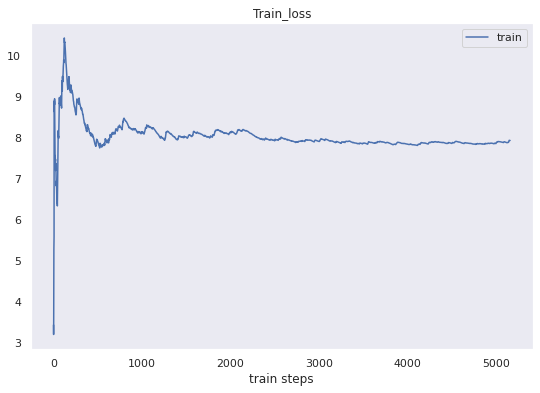

Val loss: 7.9413971581817115


  0%|          | 0/5163 [00:00<?, ?it/s]

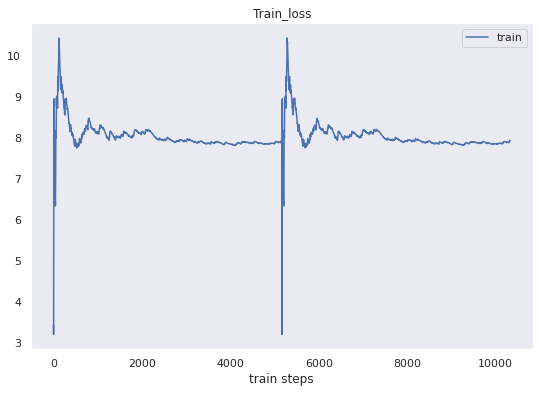

Val loss: 7.9413971581817115


In [ ]:
# Assert выполняется при любом количестве эпох, так как predicts становятся пустым тензором с началом каждой эпохи
assert test(model, criterion, test_loader_scaled, 2).shape[0] == y_test.shape[0]

## Assignment 2. (0 points, but if not completed, the maximum score for the whole task will be 0 points)

Write a brief report on how you achieved the obtained quality: what tools you used and what experiments you conducted. Describe in detail the architectures and hyperparameter values, as well as the metrics they showed on the test set. To have your report accepted, at least 3 experiments should be provided.

In [210]:
# To begin with, I used a simple model with several layers (I tried with a sigmoid at the end, but it works better without it) and an SGD optimizer
# Butch size 140 as a well-behaved one that does not take long to wait
set_random_seed(12)
train_set_scaled = SongsDataset(X_train_scaled, y_train_scaled) 
train_loader_scaled = torch.utils.data.DataLoader(train_set_scaled, batch_size=140, shuffle=False)

test_set_scaled = SongsDataset(X_test_scaled, y_test_scaled) 
test_loader_scaled = torch.utils.data.DataLoader(test_set_scaled, batch_size=10, shuffle=False)

model_1 = model = nn.Sequential(
    nn.Linear(90, 60),
    nn.ReLU(),
    nn.Linear(60, 30),
    nn.ReLU(),
    nn.Linear(30, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    )

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

  0%|          | 0/3313 [00:00<?, ?it/s]

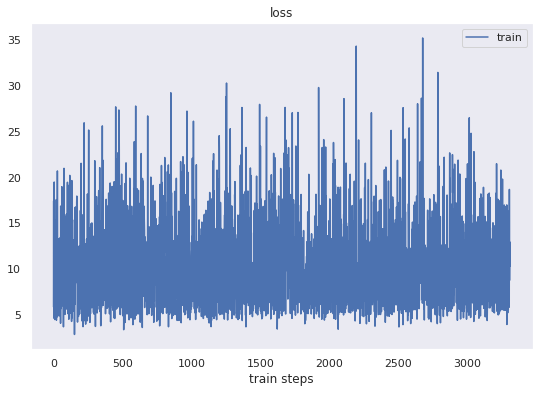

Train loss: 10.125865598867506


  0%|          | 0/3313 [00:00<?, ?it/s]

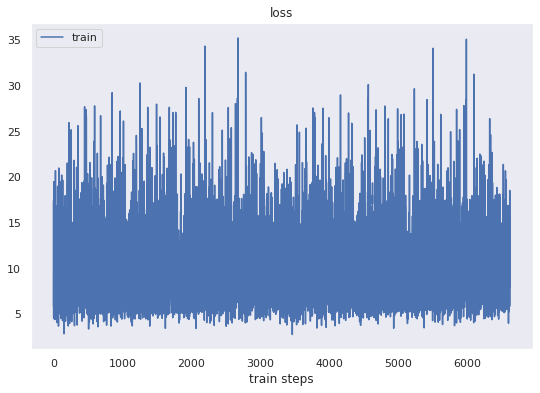

Train loss: 10.103380540968281


  0%|          | 0/3313 [00:00<?, ?it/s]

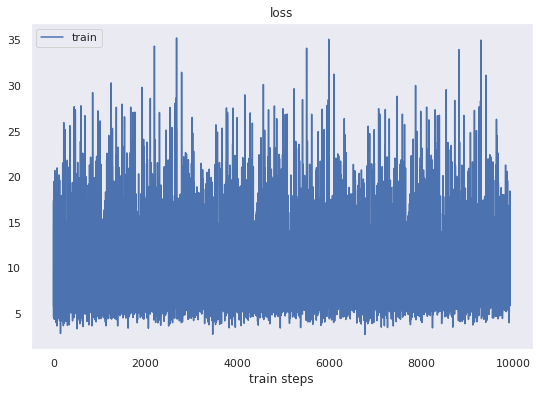

Train loss: 10.09160174503856


In [211]:
train(model_1, optimizer, criterion, train_loader_scaled, 3)

  0%|          | 0/5163 [00:00<?, ?it/s]

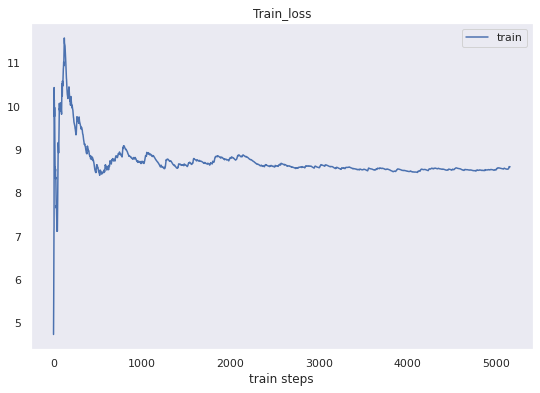

Val loss: 8.610768460980095


  0%|          | 0/5163 [00:00<?, ?it/s]

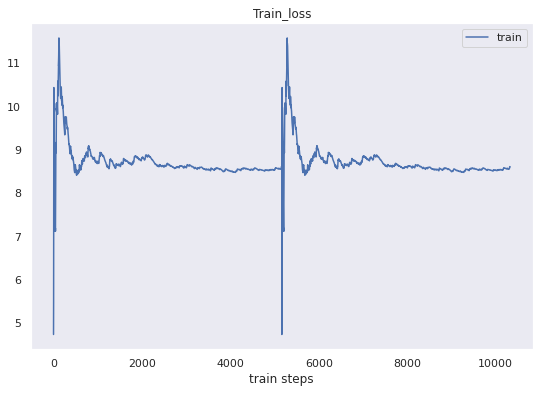

Val loss: 8.610768460980095


  0%|          | 0/5163 [00:00<?, ?it/s]

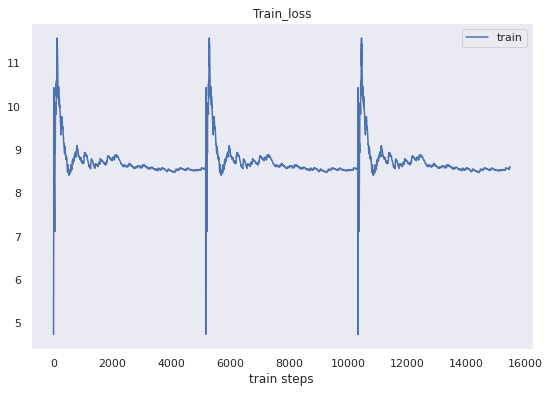

Val loss: 8.610768460980095


In [212]:
predicts = test(model_1, criterion, test_loader_scaled, 3)

In [213]:
# Tried LeakyReLU and RMSprop optimiser
set_random_seed(12)
train_set_scaled = SongsDataset(X_train_scaled, y_train_scaled) 
train_loader_scaled = torch.utils.data.DataLoader(train_set_scaled, batch_size=140, shuffle=False) 

test_set_scaled = SongsDataset(X_test_scaled, y_test_scaled) 
test_loader_scaled = torch.utils.data.DataLoader(test_set_scaled, batch_size=10, shuffle=False)

model_2 = model = nn.Sequential(
    nn.Linear(90, 60),
    nn.LeakyReLU(),
    nn.Linear(60, 30),
    nn.LeakyReLU(),
    nn.Linear(30, 10),
    nn.LeakyReLU(),
    nn.Linear(10, 1),
    )

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

  0%|          | 0/3313 [00:00<?, ?it/s]

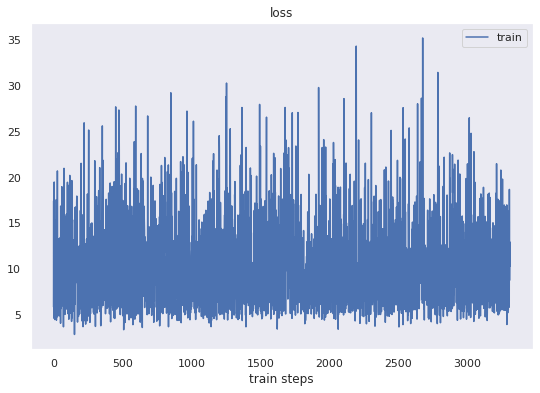

Train loss: 10.125638461474157


  0%|          | 0/3313 [00:00<?, ?it/s]

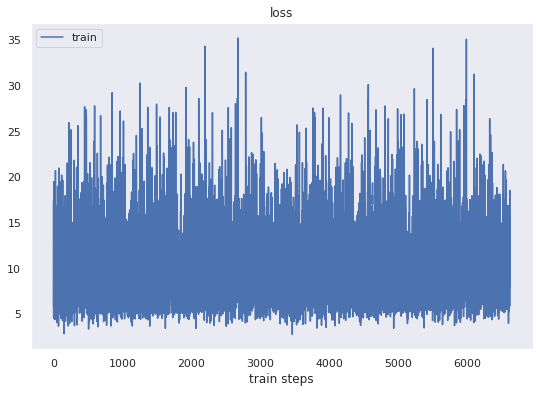

Train loss: 10.103107328621917


  0%|          | 0/3313 [00:00<?, ?it/s]

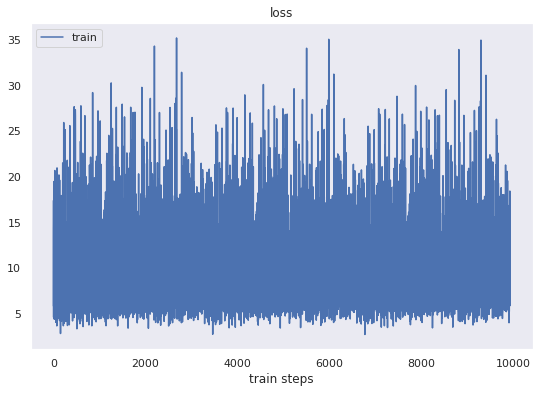

Train loss: 10.091239304067123


In [214]:
train(model_2, optimizer, criterion, train_loader_scaled, 3)

  0%|          | 0/5163 [00:00<?, ?it/s]

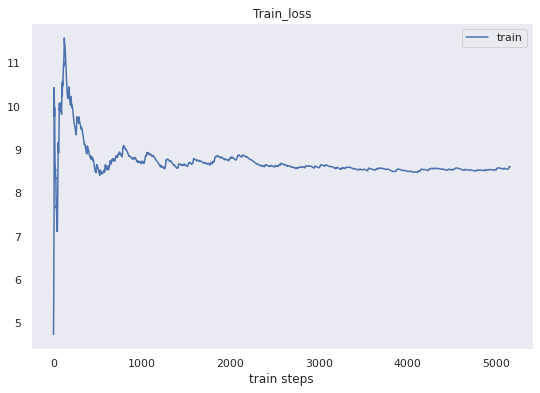

Val loss: 8.610606381028733


  0%|          | 0/5163 [00:00<?, ?it/s]

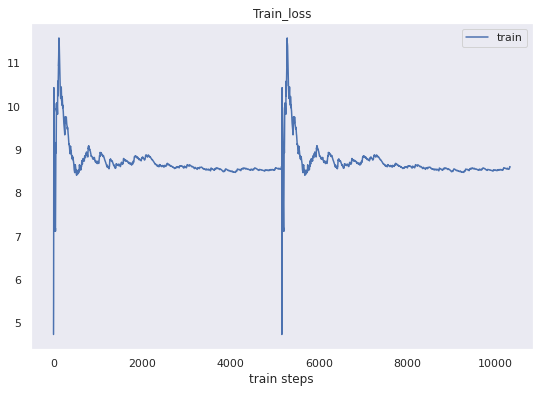

Val loss: 8.610606381028733


  0%|          | 0/5163 [00:00<?, ?it/s]

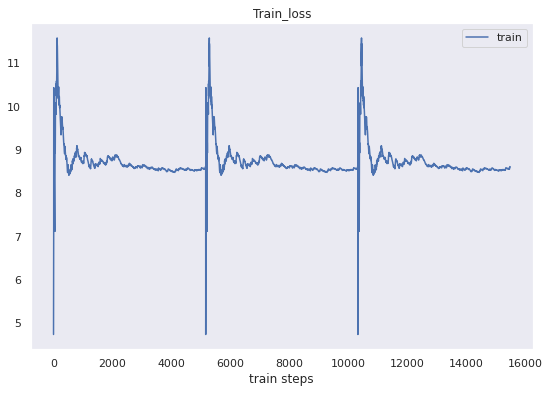

Val loss: 8.610606381028733


In [215]:
predicts = test(model_2, criterion, test_loader_scaled, 3)

In [216]:
# Next, I applied batch normalization to the existing model, as well as the improved optimizer Adam, and returned ReLU
set_random_seed(12)
train_set_scaled = SongsDataset(X_train_scaled, y_train_scaled) 
train_loader_scaled = torch.utils.data.DataLoader(train_set_scaled, batch_size=140, shuffle=False) 

test_set_scaled = SongsDataset(X_test_scaled, y_test_scaled) 
test_loader_scaled = torch.utils.data.DataLoader(test_set_scaled, batch_size=140, shuffle=False)
model_3 = nn.Sequential(
    nn.BatchNorm1d(90), 
    nn.Linear(90, 60),
    nn.ReLU(),
    nn.BatchNorm1d(60),
    nn.Linear(60, 30),
    nn.ReLU(),
    nn.Linear(30, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    )
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

  0%|          | 0/3313 [00:00<?, ?it/s]

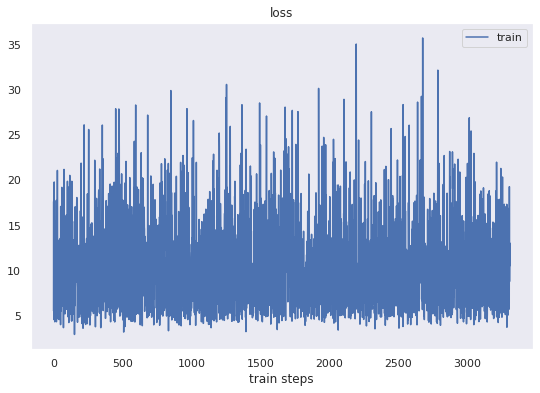

Train loss: 10.206724753014104


  0%|          | 0/3313 [00:00<?, ?it/s]

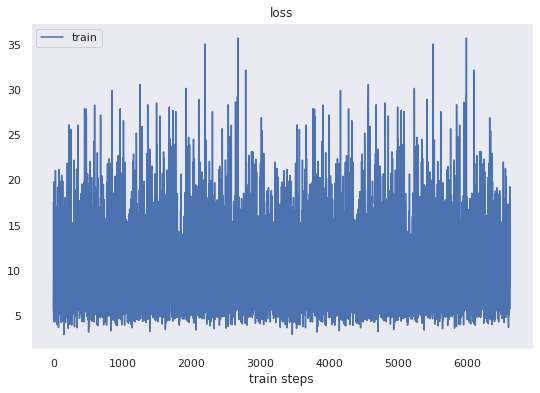

Train loss: 10.206724753014104


  0%|          | 0/3313 [00:00<?, ?it/s]

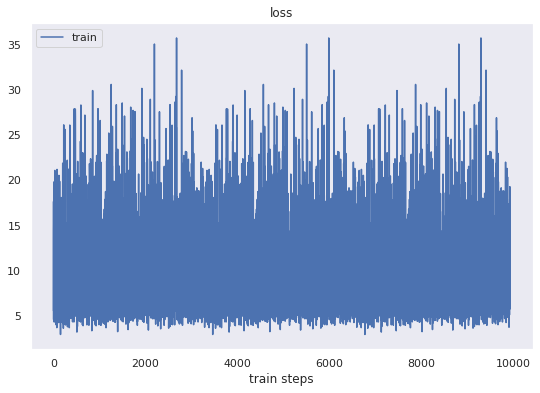

Train loss: 10.206724753014104


In [217]:
train(model_3, optimizer, criterion, train_loader_scaled, 3)

  0%|          | 0/369 [00:00<?, ?it/s]

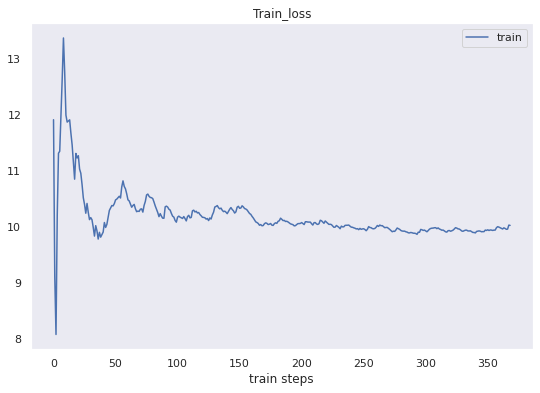

Val loss: 10.030481841884283


  0%|          | 0/369 [00:00<?, ?it/s]

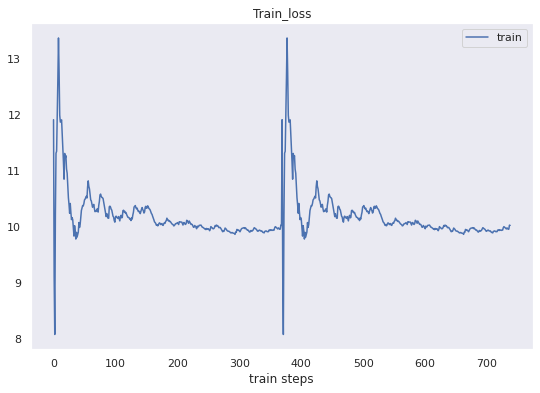

Val loss: 10.030481841884283


  0%|          | 0/369 [00:00<?, ?it/s]

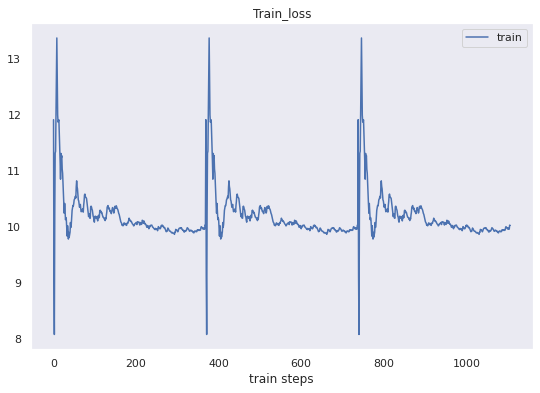

Val loss: 10.030481841884283


In [218]:
predicts = test(model_3, criterion, test_loader_scaled, 3)

In [219]:
# Finally, I added Dropout (only at the end, since it doesn't go well with batch normalization)
# with the usual hyperparameter value and significantly reduced the batch size, since everything else didn't help much
# I also increased the learning_rate to minimize it a little faster
set_random_seed(12)
train_set_scaled = SongsDataset(X_train_scaled, y_train_scaled) 
train_loader_scaled = torch.utils.data.DataLoader(train_set_scaled, batch_size=12, shuffle=False) 

test_set_scaled = SongsDataset(X_test_scaled, y_test_scaled) 
test_loader_scaled = torch.utils.data.DataLoader(test_set_scaled, batch_size=12, shuffle=False)
model_4 = nn.Sequential(
    nn.BatchNorm1d(90), 
    nn.Linear(90, 60),
    nn.ReLU(),
    nn.BatchNorm1d(60),
    nn.Linear(60, 30),
    nn.ReLU(),
    nn.Linear(30, 10),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(10, 1),
    )
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

  0%|          | 0/38643 [00:00<?, ?it/s]

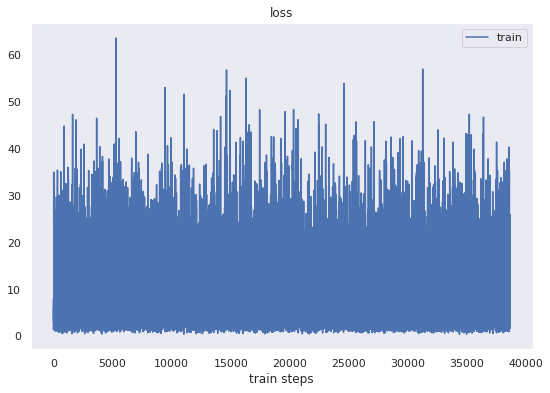

Train loss: 8.766579369752012


  0%|          | 0/38643 [00:00<?, ?it/s]

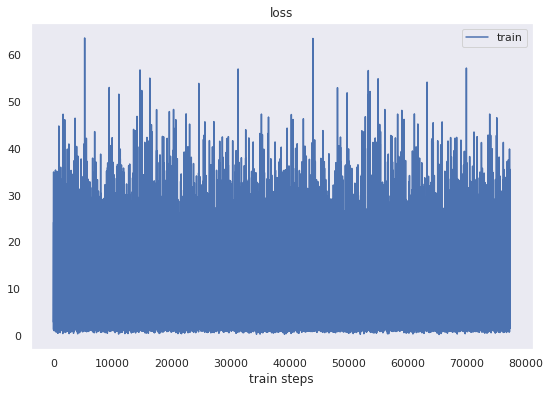

Train loss: 8.76585270168783


In [220]:
# Yes, the batch is small, but 3 epochs still pass quite quickly (about 3 minutes)
train(model_4, optimizer, criterion, train_loader_scaled, 2)

  0%|          | 0/4303 [00:00<?, ?it/s]

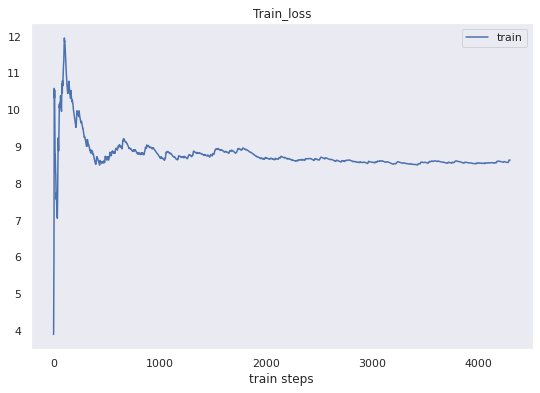

Val loss: 8.640786165928974


  0%|          | 0/4303 [00:00<?, ?it/s]

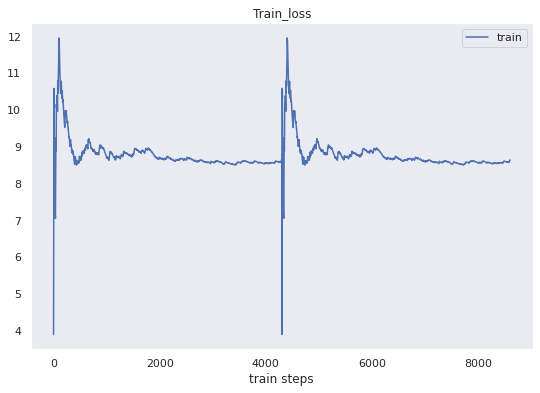

Val loss: 8.640786165928974


In [221]:
predicts = test(model_4, criterion, test_loader_scaled, 2)

The dropout effect is clearly visible, which does not allow the neural network to operate at full capacity during training (therefore, the loss on the train is significantly higher than the loss on the test)

Thus, even 2 models break the threshold of 8.77
